In [2]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from scipy.signal import savgol_filter
# logger = logging.getLogger(__name__)

%matplotlib inline

# datafolder=r'C:\Users\ArunBabu\OneDrive - ANTELOPUS ENERGY PRIVATE LIMITED\Python\Digitization\Image2Segy\MapDigitize\\'
# crop_folder=datafolder+'cropped//'
import os
# [f  for f in os.listdir(crop_folder) if '_crop.png' in f]


from scipy import convolve
# 
# gray.sum(axis=0)
def rollavg_convolve(a,n):
    'scipy.convolve'
    assert n%2==1
    return convolve(a,np.ones(n,dtype='float')/n, 'same')[n//2:-n//2+1] 

def getedgeIndexes(res):
    a,b=np.histogram(res,50)
    a[a<len(res)*0.002]=0
    idxs=np.where(a==0)
    res[res<=b[idxs[0][0]]]=0
    res[res>=b[idxs[0][0]]]=1
    diff=np.diff(res)
    # diff=np.diff(res)
    return np.where(diff!=0)
def cleanbigarray(idyes):
    if len(idyes)>2:
        diff=np.diff(idyes)
    #         print(diff)
        idy=np.argmax(diff)
        return np.array([idyes[idy],idyes[idy+1]])
    else:
        return idyes
        
def getSectionBoundary(gray): #with 0 and 1s
    thresh=gray.mean()
    gray[gray<=thresh]=1
    gray[gray>=thresh]=0
    resx=gray.sum(axis=0)
    resy=gray.sum(axis=1)
    idxes=getedgeIndexes(resx)
    idyes=getedgeIndexes(resy)
    idxes,idyes=idxes[0],idyes[0]
    idyes=cleanbigarray(idyes)
    idxes=cleanbigarray(idxes)
    return idxes,idyes

#         print(idyes[idy],idyes[idy+1])



# Following three functions are for horizontal filtering




# def findMidpointsofHorlines(selim):
#     res=selim.sum(axis=1).astype(float)
#     res[res<=w*0.8]=0
#     res[res>w*0.8]=1.0
#     diff=np.diff(res)
#     posids=np.where(diff==1.0)[0]
#     negids=np.where(diff==-1.0)[0]
#     print(posids,negids)
#     arrlen=len(negids) if len(posids)>len(negids) else len(posids)
#     midpoints=((posids[:arrlen]+negids[:arrlen])/2).astype(int)    
#     return midpoints
# for i,j in zip(posids,negids)
# plt.plot(res)
# array([  25,  253,  820, 1610, 2397, 3191, 3954])






def precisionFiltering(clipped_im):
    ncols=3
    resim=clipped_im[:100,30:200] # This to be checked with image
    width=int(getWidthofHorline(resim))
    print('width',width)
    
    # Finding the midpoints of horizontal lines
    selim=clipped_im[:,:200]
    h,w=selim.shape
    midpoints=findMidpointsofHorlines(selim)
    print('midpoints ',midpoints)
    mfilter=np.vstack([np.zeros((width,ncols))+0.5,np.ones((width,ncols)),np.zeros((width,ncols))+0.5])
    
    #Application of filter
    for mp in midpoints:
    #     mp=midpoints[0]
        pad=20
        if pad>mp:
            pad=mp
        resim=clipped_im[mp-pad:mp+pad,:]
        if mp==midpoints[0]:
            plt.figure(figsize=(12,4))
            plt.imshow(resim[:,:200])
        opencvOutput = cv2.filter2D(resim, -1, mfilter)
        resim[(opencvOutput>(ncols*4-1))&(opencvOutput<ncols*7)]=0
        clipped_im[mp-pad:mp+pad,:]=resim
        if mp==midpoints[0]:
            plt.figure(figsize=(12,4))
            plt.imshow(resim[:,:200])
    return clipped_im
        
    # resim=clipped_im[:200,:2000]
#     

In [5]:
datafolder=r'D:\Ameyem\Bhugarbho\JOGMEC\SeismicSection\Vietnam\rawimages\\'
file='to_track.png'
file='0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730.tif'
# file='0254_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ 74-730_crop.png'
file='0128_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ B-129.tif'
file='0048_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ A-109_crop.png'
file='0054_1974_South China Sea_2D_Repro_1974_Time_Unmigrated_ A-117.tif'

In [6]:
# # cvImg =  cv2.cvtColor(selim,cv2.COLOR_GRAY2RGB)
# # height, width = selim.shape
# # bytesPerLine = 3 * width
# # # cvImg =  cv2.cvtColor(cvImg,cv2.COLOR_GRAY2RGB)
# def read(filename, default=None):
#     try:
#         reader = QImageReader(filename)
#         reader.setAutoTransform(True)
#         return reader.read()
#     except:
#         return default
    
# image_data = read(datafolder+file, None)
# # self.label_file = None
# # self.canvas.verified = False

# # if isinstance(self.image_data, QImage):
# #     image = self.image_data
# # else:

# image_data.size()

# # # # mpixmap=QPixmap.fromImage(image_data)
# if isinstance(image_data, QImage):
#     qimg =image_data
# # mpixmap=QPixmap.fromImage(image_data)

# import numpy as np
# # image = QImage.fromData(image_data)
# # qImg = QImage(cvImg, width, height, bytesPerLine, QImage.Format_RGB888)

# #         print('-----QPixmap_to_Opencv-----')
# # #         print('qtpixmap type:',type(qtpixmap))
# # #         qimg = qtpixmap.toImage()  # QPixmap-->QImage
# #         print('qimg type:', type(qimg))

# #         temp_shape = (qimg.height(), qimg.bytesPerLine() * 8 // qimg.depth())
# #         temp_shape += (4,)
# #         ptr = qimg.bits()
# #         ptr.setsize(qimg.byteCount())
# #         result = np.array(ptr)
# #         result =result.reshape(temp_shape)
# #         result = result[..., :3]
# #         # cv2.imwrite('./result.jpg',result) # If saved, RGB format will be displayed
# #         result.astype(np.uint8)

In [7]:
# # qimg.byteCount()
# # image.shape
# # qimg.size()
# oh,ow,_=image.shape


In [8]:
# plt.plot(res)
# plt.hlines(b[idxs[0][0]],0,1200)
image = cv2.imread(datafolder+file)
oh,ow,_=image.shape
if oh>4500:
    fact=int(100*4500/oh)/100
    image = cv2.resize(image, (0, 0), fx = fact, fy = fact)
oh,ow,_=image.shape
print(oh,ow)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

xs,ys=gray.shape

idxes,idyes=getSectionBoundary(gray)
# idxes,idyes=np.round(idxes*orxs/xs).astype(int),np.round(idyes*orys/ys).astype(int)
idxes,idyes

# plt.plot(res)
# idxs

# clipped_im.shape
# (3969, 12077)

4416 15226


(array([  143, 12897], dtype=int64), array([ 304, 4231], dtype=int64))

In [9]:
[(idxes[0], idyes[0]), (idxes[1], idyes[0]), (idxes[1], idyes[1]), (idxes[0], idyes[1])],gray.shape

([(143, 304), (12897, 304), (12897, 4231), (143, 4231)], (4416, 15226))

In [10]:
hratio=1
idxes,idyes=(idxes*hratio).astype(int),(idyes*hratio).astype(int)
idxes,idyes

(array([  143, 12897]), array([ 304, 4231]))

In [33]:
# mlist=[(25.672, 1456.886), (8080.262000000001, 1456.886), (8080.262000000001, 
# 4101.102), (25.672, 4101.102)]

# # plt.imshow(gray)
# np.array(mlist).astype(int)

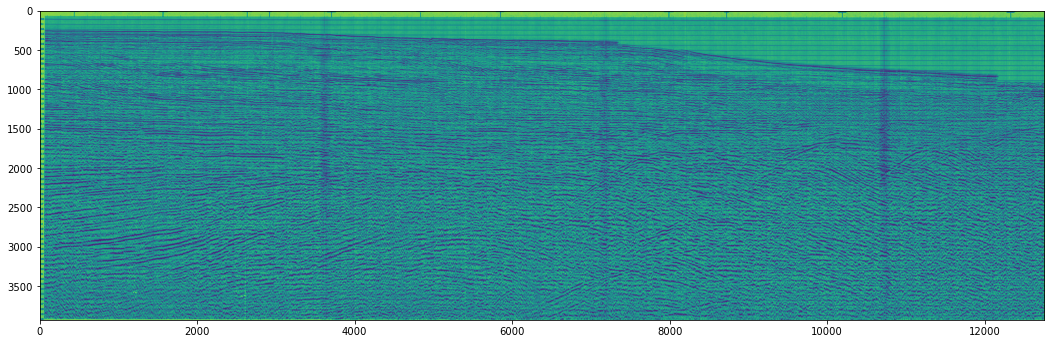

In [12]:
# plt.imshow(gray[218:615,4:1212])
clipped_im=image[idyes[0]:idyes[1],idxes[0]:idxes[1],:]
# clipped_im=image
clipped_im=cv2.cvtColor(clipped_im, cv2.COLOR_BGR2GRAY)

# thresh=clipped_im.mean()
# clipped_im[clipped_im<=thresh]=1
# clipped_im[clipped_im>=thresh]=0

plt.figure(figsize=(18,6))
plt.imshow(clipped_im)

In [5]:
# plt.figure(figsize=(18,6))
# plt.imshow(red_im)
# # cv2.imshow("Rotated by 45 Degrees", red_im)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [59]:
# deg=2
# rad=deg*np.pi/180
# ###

# rad=0.1
# deg=rad*180/np.pi
# deg


2099

In [6]:
def getRotationAngle(clipped_im):
    red_im = cv2.resize(clipped_im, (0, 0), fx = 0.1, fy = 0.1)
    (h, w) = red_im.shape[:2]
    print(h,w)
    (cX, cY) = (w // 2, h // 2)
    score=[]
    angles=np.arange(-5,5,0.1)
    for angle in angles:
        M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
        rotated = cv2.warpAffine(red_im, M, (w, h))
        res=rotated.sum(axis=0)
        sres=np.sort(res)[::-1]
        
        score.append(np.sum(sres[:10]))
    idmax=np.argmax(score)
    # print(idmax,angles[idmax],score[idmax])
    return angles[idmax]
#     print(angle,res.min(),res.max())
# cv2.imshow("Rotated by 45 Degrees", rotated)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.figure(figsize=(18,6))
# plt.imshow(rotated)

267 800
-0.10000000000001741


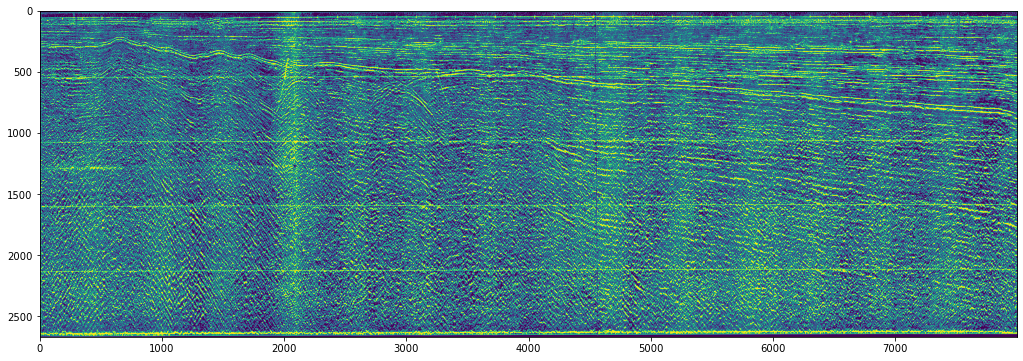

In [7]:
rotangle=getRotationAngle(clipped_im)
print(rotangle)
(h, w) = clipped_im.shape[:2]
(cX, cY) = (w // 2, h // 2)
M = cv2.getRotationMatrix2D((cX, cY), rotangle, 1.0)
rotated = cv2.warpAffine(clipped_im, M, (w, h))
plt.figure(figsize=(18,6))
plt.imshow(rotated)

In [87]:
# midpoints=findMidpointsofHorlines(selim)
# zerotlineid,pad2blookedat
# columnshifts=getColumnShifts(clipped_im,zerotlineid,pad2blookedat)

In [13]:
def getWidthofHorline(resim): #having a line
    widths=[]
    for i in range(15):
        diff=np.diff(resim[:,i].astype(float))
        idxs=np.where(diff!=0)[0]

        if len(idxs)>1:
            npixels=idxs[1]-idxs[0]
            widths.append(npixels)
    #         print()
#             plt.plot(resim[:,i])
    width=np.median(widths)
    return width
def movAverage(arr,window_size):
    moving_averages = []
    i = 0
    # Loop through the array t o
    #consider every window of size 3
    while i < len(arr) - window_size + 1:

        # Calculate the average of current window
        window_average = round(np.sum(arr[
          i:i+window_size]) / window_size, 2)

        # Store the average of current
        # window in moving average list
        moving_averages.append(window_average)

        # Shift window to right by one position
        i += 1
    return np.array(moving_averages)
# plt.plot(res[0:30])
# mfilter,nonzeroid

In [9]:
print(rotangle)

-0.10000000000001741


In [171]:
# ncols=5
# resim=clipped_im[:100,30:200] # This to be checked with image
# width=int(getWidthofHorline(resim))
# print('width',width)

# # Finding the midpoints of horizontal lines
# selim=clipped_im[:,:200]
# h,w=selim.shape
# midpoints=findMidpointsofHorlines(selim)
# print('midpoints ',midpoints)
# mfilter=np.vstack([np.zeros((width,ncols))-0.5,np.ones((width,ncols)),np.zeros((width,ncols))-0.5])

In [174]:
# mp=midpoints[0]
# pad=20
# if pad>mp:
#     pad=mp
# resim=clipped_im[mp-pad:mp+pad,:].astype(float)
# resim[resim<=0]=-1.0
# plt.figure(figsize=(12,4))
# plt.imshow(resim[:,:200])

In [147]:

# nonzeroid
# resim[resim<=0]=-1.0
# len(resim)
# resim.shape,mfilter.shape

# opencvOutput.max()

21

In [36]:
# opencvOutput[linelocations[-1]-1:linelocations[-1]+2,i],i
# linelocations

h,w,int(3*h/100),int(w/400),int(w/55)

(2669, 145, 80, 0, 2)

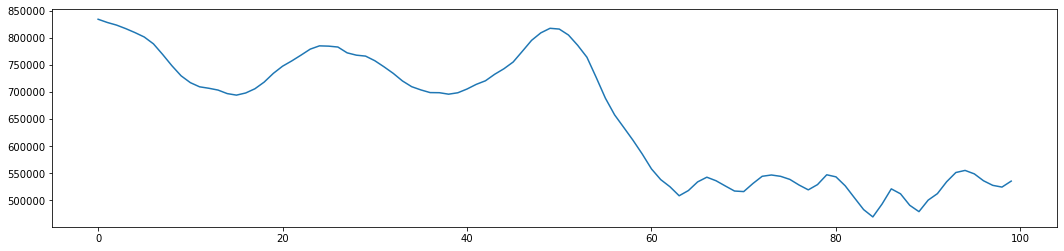

In [14]:
res=clipped_im.sum(axis=0)
plt.figure(figsize=(18,4))
plt.plot(res[:100])

In [13]:
# zerotlineid,midpoints
# mfilter

In [16]:
def getColumnShifts(clipped_im,zerotlineid,pad2blookedat,mfilter):
    mp=zerotlineid
    pad=pad2blookedat
    if pad>mp:
        pad=mp
    resim=clipped_im[mp-pad:mp+pad,:].astype(float)
    resim[resim<=0]=-1.0

    res=resim.sum(axis=0)
    nonzeroid=np.where(res[:50]>-resim.shape[0] )[0][0]
    
    opencvOutput = cv2.filter2D(resim, -1, mfilter)

    mid=np.argmax(opencvOutput[:,nonzeroid])
    linelocations=[mid]
    for i in range(nonzeroid+1,opencvOutput.shape[1]):   
        if linelocations[-1]>=1:
            mid=np.argmax(opencvOutput[linelocations[-1]-1:linelocations[-1]+2,i])
            linelocations.append(linelocations[-1]-1+mid)
        else:
            mid=np.argmax(opencvOutput[:,i])
            linelocations.append(mid)
        if len(linelocations)>6:
            if np.mean(linelocations[-5:-1])<linelocations[-1]-2:
#                 print(i,np.mean(linelocations[-5:-1]),linelocations[-1]-2)
                mid=np.argmax(opencvOutput[:,i])
                linelocations[-1]=mid

    return np.arange(nonzeroid,len(linelocations)+nonzeroid),np.array(linelocations)


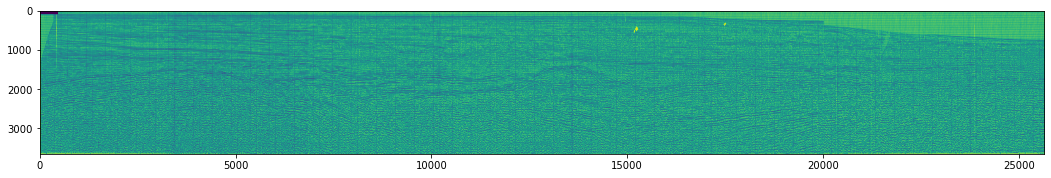

In [123]:
plt.figure(figsize=(18,4))
plt.imshow(clipped_im)

In [17]:
def findMidpointsofHorlines(selim):
    res=selim.sum(axis=1).astype(float)
    h,w=selim.shape
    res[res<=w*0.8]=0
    res[res>w*0.8]=1.0
    diff=np.diff(res)
    posids=np.where(diff==1.0)[0]
    negids=np.where(diff==-1.0)[0]
    print('posids,negids in findMidpointsofHorlines',posids,negids)
    arrlen=len(negids) if len(posids)>len(negids) else len(posids)
    midpoints=((posids[:arrlen]+negids[:arrlen])/2).astype(int)    
    return midpoints

In [19]:
  

# ncols=5

# # thresh=clipped_im.mean()
# # clipped_im[clipped_im<=thresh]=1
# # clipped_im[clipped_im>=thresh]=0

# h,w=clipped_im.shape
# # resim=clipped_im[:int(3*h/100),int(w/400):int(w/55)] # This to be checked with image
# resim=clipped_im[:int(3*h/50),int(w/400):int(w/55)] # This to be checked with image
# width=int(getWidthofHorline(resim))
# print('width',width)

# # Finding the midpoints of horizontal lines
# selim=clipped_im[:,:int(w/55)]
# h,w=selim.shape
# midpoints=findMidpointsofHorlines(selim)
# mfilter=np.vstack([np.zeros((width,ncols))-0.5,np.ones((width,ncols)),np.zeros((width,ncols))-0.5])
# zerotlineid=midpoints[0]
# pad2blookedat=50

# # colnumbers,shifts2bapplied=getColumnShifts(clipped_im,zerotlineid,pad2blookedat,mfilter)

In [20]:
clipped_im=image
clipped_im=cv2.cvtColor(clipped_im, cv2.COLOR_BGR2GRAY)

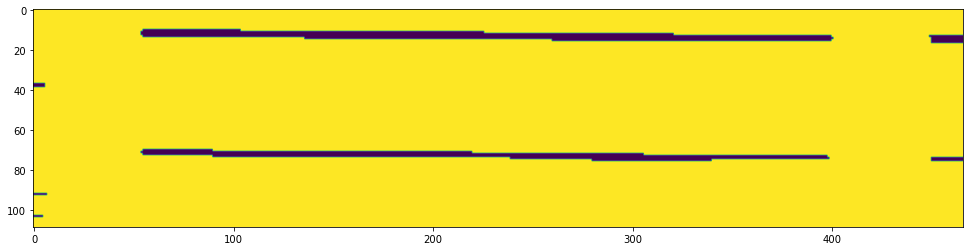

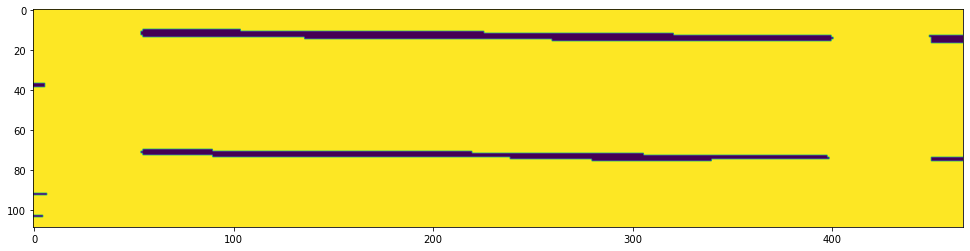

In [142]:



# selim.shape,cols / 30
plt.figure(figsize=(18,4))
plt.imshow(selim)
# plt.xlim([2000,5000])
# plt.ylim([0,200])
plt.show()
plt.figure(figsize=(18,4))
plt.imshow(horizontal)
# plt.xlim([2000,5000])
# plt.ylim([0,200])

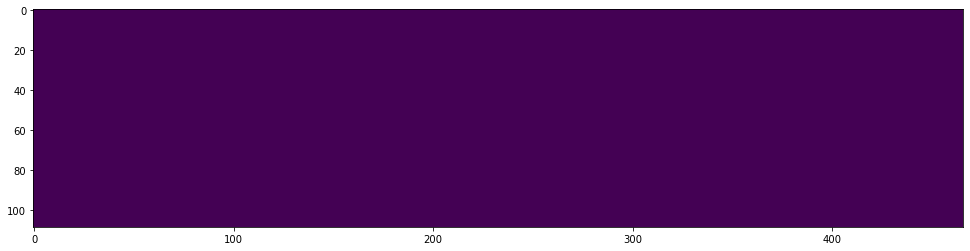

In [126]:
# plt.hist(selim.ravel())

# selim[selim>127.0]=0.0
# selim[selim<=127.0]=1.0
# selim[selim<=127.0]
# plt.figure(figsize=(18,4))
# plt.imshow(selim)

In [134]:


midpoints
# plt.figure(figsize=(18,4))
# plt.plot(res)

array([12, 72])

In [150]:
clipped_im[mp-fpad:mp+bpad,:]

array([[158, 196, 209, ..., 201, 206, 210],
       [130, 180, 206, ..., 206, 211, 212],
       [107, 165, 205, ..., 210, 213, 211],
       ...,
       [203, 207, 206, ..., 217, 212, 209],
       [188, 204, 206, ..., 211, 211, 211],
       [166, 198, 205, ..., 211, 211, 211]], dtype=uint8)

12 50
rows,cols  62 25642
horizontalsize 10


(0.0, 200.0)

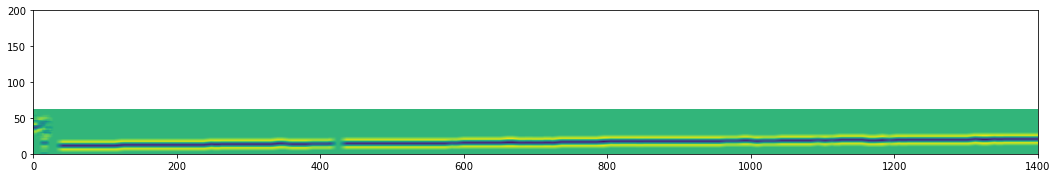

In [166]:
def getHorlineMidpoints(clipped_im):
    h,w=clipped_im.shape
    selim=clipped_im[:int(3*h/100),:int(w/55)]
    horizontal = cv2.adaptiveThreshold(selim,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
    rows,cols = horizontal.shape
    horizontalsize = int(cols / 10)
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
    # horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
    horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
    selim=horizontal.astype(float)

    # selim[selim<=127.0]=1
    # selim[selim>127.0]=0
    res=selim.sum(axis=1)
    # print(res.mean())
    res[res<=res.mean()]=1
    res[res>res.mean()]=0

    # h,w=selim.shape
    # res[res<=w*0.8]=0
    # res[res>w*0.8]=1.0
    diff=np.diff(res)
    posids=np.where(diff==1.0)[0]
    negids=np.where(diff==-1.0)[0]
    # print('posids,negids in findMidpointsofHorlines',posids,negids)
    arrlen=len(negids) if len(posids)>len(negids) else len(posids)
    midpoints=((posids[:arrlen]+negids[:arrlen])/2).astype(int)  
    return midpoints
def getCleanedCurve(shifts2bapplied):
    # mav=movAverage(shifts2bapplied,5)
    x=np.arange(len(shifts2bapplied))
#     y=idxs
    z = np.polyfit(x, shifts2bapplied, 3)
    f = np.poly1d(z)
    mav = f(x)
#     mav = savgol_filter(shifts2bapplied, 101, 3) # window size 51, polynomial order 3
    pttable=shifts2bapplied>mav+1
    nttable=shifts2bapplied<mav-1
    shifts2bapplied[pttable]=mav[pttable]+1
    shifts2bapplied[nttable]=mav[nttable]+1
    return shifts2bapplied
def getColumnShifts(clipped_im,zerotlineid,pad2blookedat,mfilter):
    midpoints=getHorlineMidpoints(clipped_im)
    mp=zerotlineid
    pad=pad2blookedat
    fpad,bpad=pad,pad
#     print(mp,pad)
    if pad>mp:
        fpad=mp
    resim=clipped_im[mp-fpad:mp+bpad,:]
    horizontal = cv2.adaptiveThreshold(resim,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
    rows,cols = horizontal.shape
#     print('rows,cols ',rows,cols )
#     horizontalsize = int(cols / 250)
    horizontalsize=10
#     print('horizontalsize',horizontalsize)
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
    # horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
    horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
    resim=horizontal.astype(float)
    width=5
    ncols=10
    mfilter=np.vstack([np.zeros((width,ncols))-0.5,np.ones((width,ncols)),np.zeros((width,ncols))-0.5])
    opencvOutput = cv2.filter2D(resim, -1, mfilter)
    idxs=np.argmin(opencvOutput,axis=0)
    clnidxs=getCleanedCurve(idxs)
    return clnidxs

plt.figure(figsize=(18,4))
plt.imshow(opencvOutput)
plt.xlim([0,1400])
plt.ylim([0,200])
# resim[resim<=0]=-1.0

# res=resim.sum(axis=0)
# nonzeroid=np.where(res[:50]>-resim.shape[0] )[0][0]

# opencvOutput = cv2.filter2D(resim, -1, mfilter)

# mid=np.argmax(opencvOutput[:,nonzeroid])
# linelocations=[mid]
# for i in range(nonzeroid+1,opencvOutput.shape[1]):   
#     if linelocations[-1]>=1:
#         mid=np.argmax(opencvOutput[linelocations[-1]-1:linelocations[-1]+2,i])
#         linelocations.append(linelocations[-1]-1+mid)
#     else:
#         mid=np.argmax(opencvOutput[:,i])
#         linelocations.append(mid)
#     if len(linelocations)>6:
#         if np.mean(linelocations[-5:-1])<linelocations[-1]-2:
# #                 print(i,np.mean(linelocations[-5:-1]),linelocations[-1]-2)
#             mid=np.argmax(opencvOutput[:,i])
#             linelocations[-1]=mid

# colnumbers,shifts2bapplied=np.arange(nonzeroid,len(linelocations)+nonzeroid),np.array(linelocations)

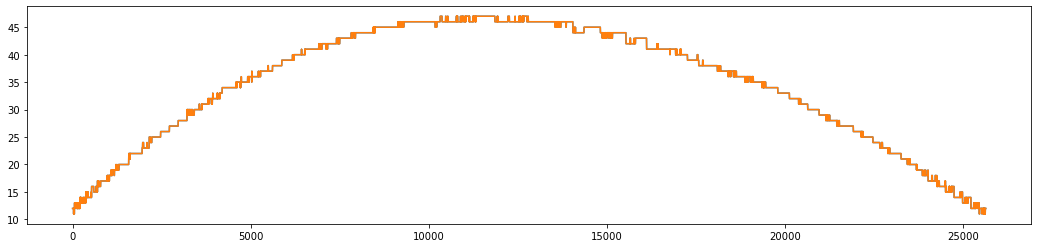

In [180]:
# plt.plot(opencvOutput[:,60])
plt.figure(figsize=(18,4))
idxs=np.argmin(opencvOutput,axis=0)
clnidxs=getCleanedCurve(idxs)
plt.plot(idxs)
plt.plot(clnidxs)

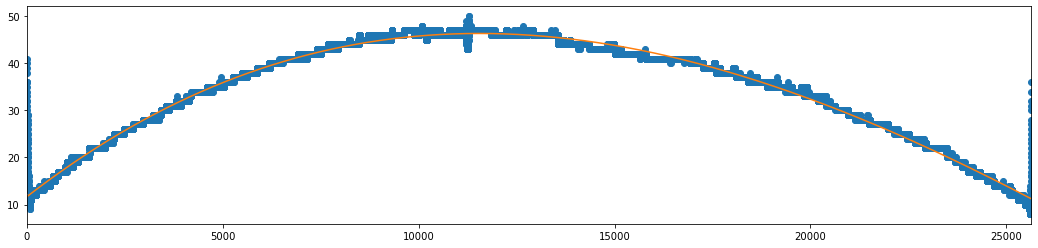

In [178]:
# calculate polynomial
x=np.arange(len(idxs))
y=idxs
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
y_new = f(x)
# calculate new x's and y's
# x_new = np.linspace(x[0], x[-1], 50)

plt.figure(figsize=(18,4))
plt.plot(x,y,'o', x, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [179]:

def getStraightenedImage(clipped_im,colnumbers,shifts2bapplied):
    shifted_image=np.zeros_like(clipped_im)
    # idlist=np.arange(nonzeroid,len(linelocations)+nonzeroid)
    for i,cor in zip(colnumbers,shifts2bapplied):
        if cor!=0:
            shifted_image[:-cor,i]=clipped_im[cor:,i]
        else:
            shifted_image[:,i]=clipped_im[:,i]
    return shifted_image

In [164]:
for i in range( resim.shape[1]):
    print(np.where(resim[:,i]==0))
    if i==1000: 
          break

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], d

(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)
(array([16, 17, 18, 19], dtype=int64),)


(0.0, 200.0)

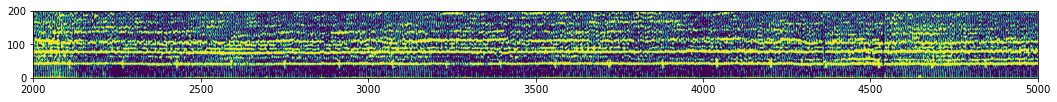

In [64]:
plt.figure(figsize=(18,4))
plt.imshow(straightImage)
# plt.xlim([0,1000])
plt.xlim([2000,5000])
plt.ylim([0,200])

In [59]:
shifts2bapplied=getCleanedCurve(shifts2bapplied)
straightImage=getStraightenedImage(clipped_im,colnumbers,shifts2bapplied)

In [22]:
# selim.shape,resim.shape,midpoints
midpoints=findMidpointsofHorlines(selim)

posids,negids in findMidpointsofHorlines [  29   70   85  180  307  557 1085 1609 2138 2645 2665] [  31   72   87  185  309  561 1088 1613 2142 2654]


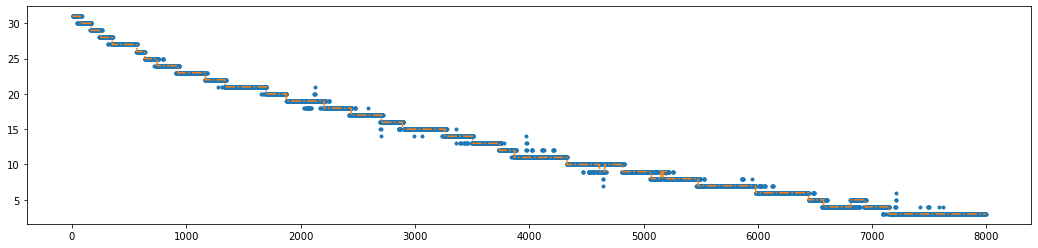

In [58]:


# plt.figure(figsize=(18,4))
# plt.imshow(opencvOutput[:,:])
# plt.xlim([0,300])
# plt.show()
plt.figure(figsize=(18,4))
plt.plot(colnumbers,shifts2bapplied,'.')
# mav=movAverage(shifts2bapplied,20)
mav = savgol_filter(shifts2bapplied, 101, 3) # window size 51, polynomial order 3
plt.plot(range(colnumbers[0],len(mav)+colnumbers[0]),np.round(mav),'-.')

# plt.xlim([0,3000])
# plt.xlim([5700,6300])

In [3]:
from PyQt5.QtGui import *
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *

In [28]:
cvImg =  cv2.cvtColor(selim,cv2.COLOR_GRAY2RGB)
height, width = selim.shape
bytesPerLine = 3 * width
# cvImg =  cv2.cvtColor(cvImg,cv2.COLOR_GRAY2RGB)
qImg = QImage(cvImg, width, height, bytesPerLine, QImage.Format_RGB888)

In [18]:
# shifts2bapplied
colnumbers,shifts2bapplied

(array([   5,    6,    7, ..., 7992, 7993, 7994], dtype=int64),
 array([11, 11, 11, ...,  3,  3,  3], dtype=int64))

AttributeError: module 'matplotlib.pyplot' has no attribute 'invert_yaxis'

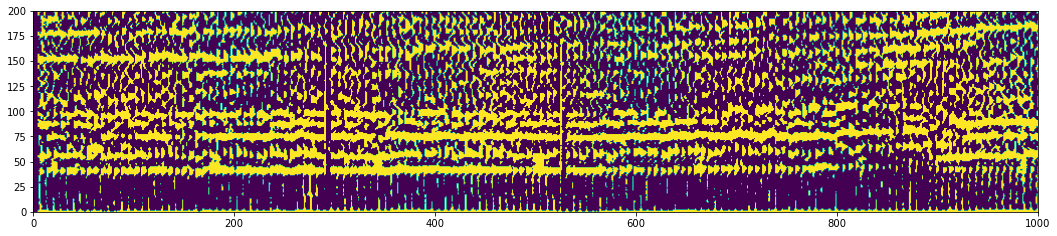

In [60]:

plt.figure(figsize=(18,4))
plt.imshow(straightImage)
plt.xlim([0,1000])
plt.ylim([0,200])
plt.invert_yaxis()

In [56]:
# dir(plt)

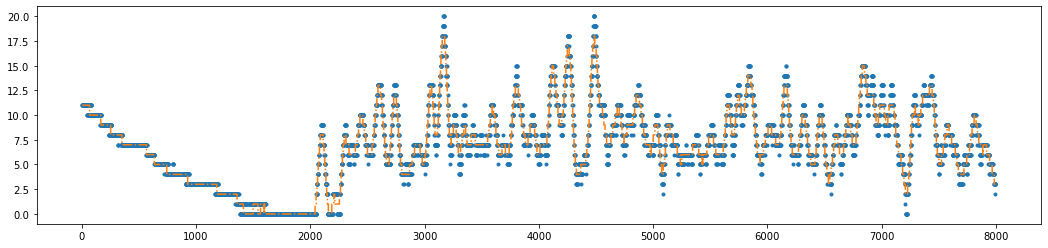

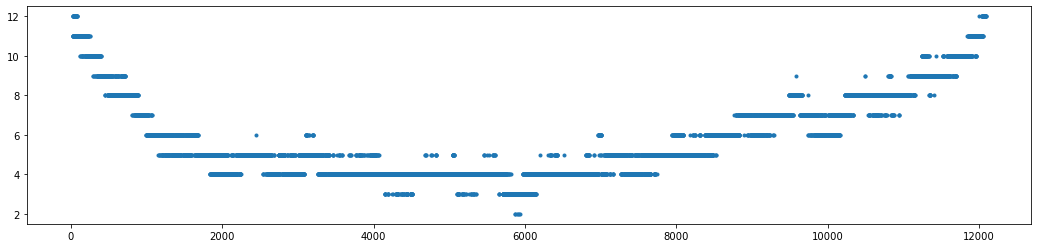

In [139]:

plt.figure(figsize=(18,4))
plt.plot(colnumbers,shifts2bapplied,'.')

In [169]:
# resim.shape
# resim[cor:,i].shape,cor,i
cor=0
shifted_image[:-cor,i].shape,resim[cor:,i].shape
mav

array([11. , 11. , 11. , ..., 11.8, 11.8, 12. ])

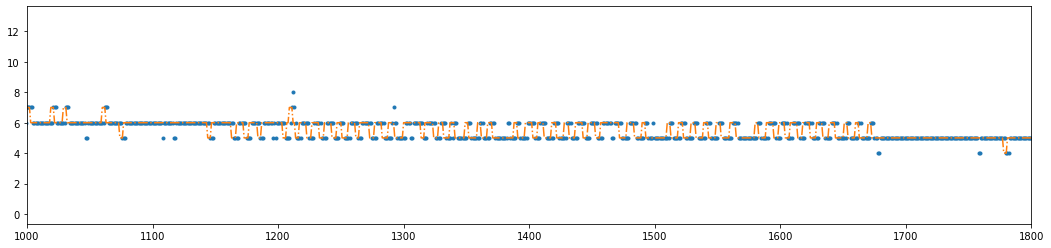

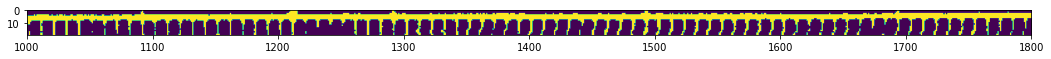

(1000.0, 1800.0)

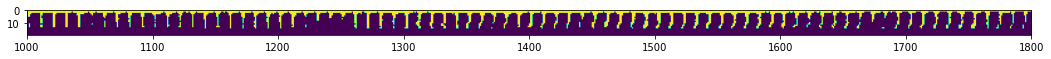

In [172]:
showfrom,till=1000,1800
plt.figure(figsize=(18,4))
plt.plot(range(nonzeroid,len(linelocations)+nonzeroid),linelocations,'.')
mav=movAverage(linelocations,5)
plt.plot(range(nonzeroid,len(mav)+nonzeroid),np.round(mav),'-.')

plt.xlim([showfrom,till])
plt.show()

plt.figure(figsize=(18,4))
plt.imshow(resim[:,:])
plt.xlim([showfrom,till])
plt.show()
shifted_image=np.zeros_like(resim)-1
idlist=np.arange(nonzeroid,len(linelocations)+nonzeroid)
for i,cor in zip(idlist,mav.astype(int)):
    if cor!=0:
        shifted_image[:-cor,i]=resim[cor:,i]
    else:
        shifted_image[:,i]=resim[:,i]
plt.figure(figsize=(18,4))
plt.imshow(shifted_image)
plt.xlim([showfrom,till])

In [55]:
w=mfilter.shape[1]
localpad=int(mfilter.shape[1]/2)
for i in range(nonzeroid-1,resim.shape[1]):
    conv=np.convolve(resim[:,i-localpad:i+w-localpad],mfilter)
    print(i)
    break

ValueError: object too deep for desired array

In [56]:
resim[:,i-localpad:i+w-localpad]
np.convolve(resim[:,i-localpad:i+w-localpad],mfilter)
# i

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.],
       [-1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.]])

In [ ]:
#Application of filter
for mp in midpoints:
#     mp=midpoints[0]
    pad=20
    if pad>mp:
        pad=mp
    resim=clipped_im[mp-pad:mp+pad,:]
    if mp==midpoints[0]:
        plt.figure(figsize=(12,4))
        plt.imshow(resim[:,:200])
    opencvOutput = cv2.filter2D(resim, -1, mfilter)
    resim[(opencvOutput>(ncols*4-1))&(opencvOutput<ncols*7)]=0
    clipped_im[mp-pad:mp+pad,:]=resim
    if mp==midpoints[0]:
        plt.figure(figsize=(12,4))
        plt.imshow(resim[:,:200])

width 5
[   9  237  803 1593 2380 3174 3933 3964] [  12  240  807 1598 2385 3179 3946]
midpoints  [  10  238  805 1595 2382 3176 3939]


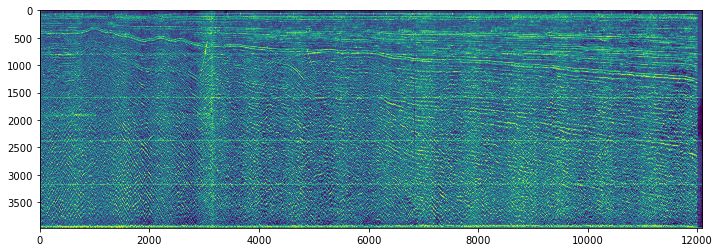

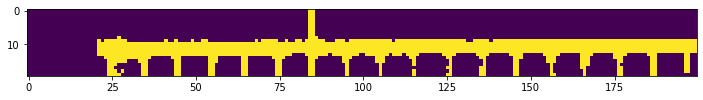

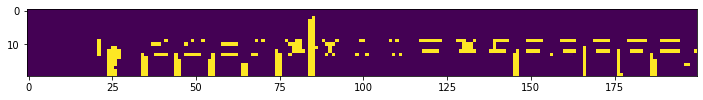

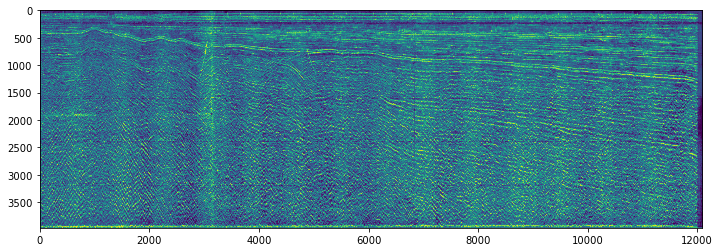

In [437]:
clipped_im=precisionFiltering(clipped_im)
plt.figure(figsize=(12,4))
plt.imshow(clipped_im)

In [438]:
# plt.hist(clipped_im.ravel())

cv2.imwrite(datafolder+file.replace('.tif','filt_crop.jpg'), clipped_im*255)

True

1197.1287128712872

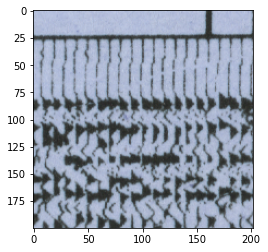

In [435]:
# h,w=clipped_im.shape
# # w*0.8
# h,w
# datafolder
plt.figure(figsize=(18,4))
i=2180
ftrc,ltrc=128,330
plt.imshow(image[i:i+200,ftrc:ltrc,:])
pixpertrc=(ltrc-ftrc)/20
(idxes[1]-idxes[0])/pixpertrc

In [427]:
# plt.figure(figsize=(18,4))
# plt.imshow(res[15:30,:1000])
# # plt.imshow(selim)
# # h,w
(idxs[-1]-idxs[0])/pixpertrc

1177.4634146341464

In [387]:
# plt.imshow(resim)
# plt.figure(figsize=(12,4))


# opencvOutput = cv2.filter2D(resim, -1, mfilter)
# rescopy=resim.copy()
# # plt.imshow(opencvOutput)
# rescopy[(opencvOutput>(ncols*4-1))&(opencvOutput<ncols*7)]=0
# plt.imshow(clipped_im[25:50,:1000])
window=10
for i in range(5,100,window):
    res=clipped_im[i:i+window,:].sum(axis=0).astype(float)
    print('res len',len(res))
    # plt.plot(res[1:1000])

    thresh=np.median(res[res>0])
    thresh=0.1
    res[res<=thresh]=0
    res[res>thresh]=1
#     plt.figure(figsize=(16,4))
#     plt.plot(res[1:1000])
    diff=np.diff(res)
    idxs=np.where(diff==1.0)[0]
    negidxs=np.where(diff==-1.0)[0]
    # idxs,
    idxdiff=np.diff(idxs)
    print(i,thresh,np.mean(idxdiff),len(idxs),len(negidxs),(idxs[-1]-idxs[0])/np.mean(idxdiff))

res len 12091
5 0.1 6.150943396226415 1962 1962 1961.0
res len 12091
15 0.1 10.166947723440135 1187 1187 1186.0
res len 12091
25 0.1 10.098744769874477 1196 1195 1195.0
res len 12091
35 0.1 9.747980613893377 1239 1238 1238.0
res len 12091
45 0.1 10.048293089092423 1202 1201 1201.0
res len 12091
55 0.1 12.544698544698544 963 962 962.0
res len 12091
65 0.1 41.05102040816327 295 294 294.0
res len 12091
75 0.1 16.109479305740987 750 749 749.0000000000001
res len 12091
85 0.1 11.902366863905325 1015 1014 1014.0
res len 12091
95 0.1 16.135026737967916 749 748 747.9999999999999


In [373]:

# ,(idxs[-1]-idxs[0])/10

1201.0

In [372]:

np.min(idxdiff),np.max(idxdiff),np.mean(idxdiff),np.median(idxdiff)
# np.median(np.diff(idxs)),np.median(np.diff(idxs))
# plt.plot(diff)

(2, 39, 10.048293089092423, 10.0)

In [305]:
# # plt.imshow(resim)
# plt.figure(figsize=(12,4))
# ncols=3
# mfilter=np.vstack([np.zeros((int(width),ncols))+0.5,np.ones((int(width),ncols)),np.zeros((int(width),ncols))+0.5])

# opencvOutput = cv2.filter2D(clipped_im, -1, mfilter)
# rescopy=clipped_im.copy()
# # plt.imshow(opencvOutput)
# rescopy[(opencvOutput>(ncols*4-1))&(opencvOutput<ncols*7)]=0
# plt.imshow(rescopy)

In [308]:
# plt.figure(figsize=(12,4))
# plt.imshow(opencvOutput)

In [309]:
# plt.hist(opencvOutput.ravel())

In [310]:

# width

In [101]:
# plt.plot(sgray)
from scipy import signal
def windowFilt(tarray,data,nclip=0,window=(3,80),order=3,retain_originalscale=False):
    fs=len(tarray)/((tarray[-1]-tarray[0])/1000)
    maxai=np.nanmax(data[nclip:])
    normdata=data[nclip:]/maxai
#     print(maxai)
#     meanai=np.nanmean(normdata)
#     normdata=normdata-meanai
    fc = window[0]  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
#     order=order
    b, a = signal.butter(order, w, 'low')
    lowfreq_data = signal.filtfilt(b, a, normdata)

#     ########################################################
    normdata=normdata-lowfreq_data #removing low frequency component
#     ########################################################
    fc = window[1]  # Cut-off frequency of the filter 70 gave 36%, 12.6ms bs
    w = fc / (fs / 2) # Normalize the frequency fs/2 is the nyquist frequency
    b, a = signal.butter(order, w, 'low')
    window_freq_data = signal.filtfilt(b, a, normdata)
    highfreq_data=normdata-window_freq_data
    return lowfreq_data,window_freq_data,highfreq_data,maxai
twt=list(range(len(sgray)))


301


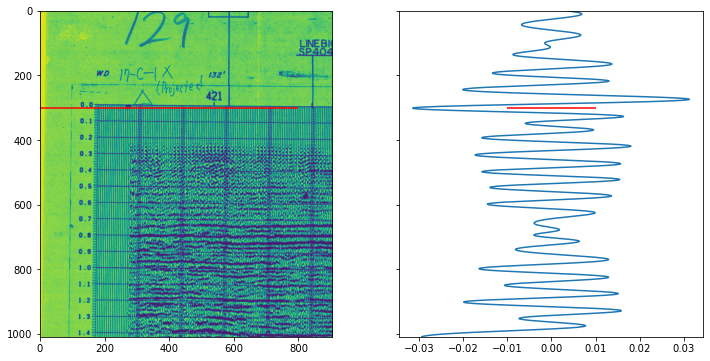

In [108]:
# plt.imshow(gray)
lf_data,wf_data,hf_data,xmaxnormmeans=windowFilt(twt,sgray,nclip=0,window=(12,20),order=4)
# plt.plot(wf_data)
# plt.plot(hf_data)
fig, (vax, hax) = plt.subplots(1, 2, figsize=(12, 6),sharey=True)
vax.imshow(gray)
idx=np.argmin(wf_data[:-10])
vax.hlines(idx,0,800,'r')

print(idx)
hax.plot(wf_data,range(len(wf_data)))
hax.hlines(idx,-0.01,0.01,'r')

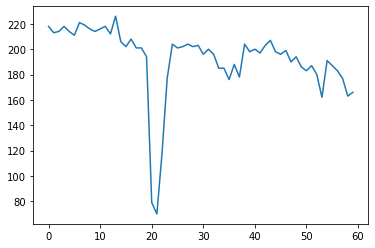

In [116]:
gray.shape
# plt.imshow(gray[idx-30:idx+30,:])
a=gray[idx-30:idx+30,200]
plt.plot(a)